## Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were
surveyed and each person was asked to report the highest education level they
obtained. The data that resulted from the survey is summarized in the following table:
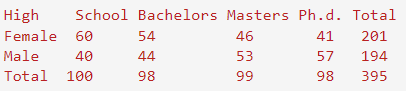
Question: Are gender and education level dependent at 5% level of significance? In
other words, given the data collected above, is there a relationship between the
gender of an individual and the level of education that they have obtained?

In [1]:
import scipy.stats as sts
from scipy.stats import norm
import math
import numpy as np
import pandas as pd

In [2]:
f_list = [60,54,46,41]
m_list = [40,44,53,57]
s = [40,60]
b = [44,54]
m = [53,46]
p = [57,41]
marks = m_list + f_list
print(marks)
sex =  ['Male','Male','Male','Male','Female','Female','Female','Female']
edu = ['High School', 'Bachelors', 'Masters', 'Ph.d.','High School', 'Bachelors', 'Masters', 'Ph.d.']
df_edu = pd.DataFrame({"Sex":sex,"Edu":edu,"Marks":marks})

#df_edu = df_edu[['Sex','High School', 'Bachelors', 'Masters', 'Ph.d.']]

#df_edu['Row_total'] = row_list
print(df_edu)
cross_tab = pd.crosstab([df_edu.Sex,df_edu.Marks],df_edu.Edu,margins=True)

[40, 44, 53, 57, 60, 54, 46, 41]
      Sex          Edu  Marks
0    Male  High School     40
1    Male    Bachelors     44
2    Male      Masters     53
3    Male        Ph.d.     57
4  Female  High School     60
5  Female    Bachelors     54
6  Female      Masters     46
7  Female        Ph.d.     41


In [3]:
df2 = pd.crosstab(df_edu.Sex, df_edu.Edu,df_edu.Marks, aggfunc="sum",margins=True)

df2.columns = ["Bachelors","High School","Masters","Ph.d.","row_totals"]

df2.index = ["Female","Male","col_totals"]

df2


,Bachelors,High School,Masters,Ph.d.,row_totals
Female,54,60,46,41,201
Male,44,40,53,57,194
col_totals,98,100,99,98,395


In [4]:
observed = df2.iloc[0:2,0:4]   # Get table without totals for later use
observed

,Bachelors,High School,Masters,Ph.d.
Female,54,60,46,41
Male,44,40,53,57


#### For a test of independence, we use the same chi-squared formula that we used for the goodness-of-fit test. The main difference is we have to calculate the expected counts of each cell in a 2-dimensional table instead of a 1-dimensional table. To get the expected count for a cell, multiply the row total for that cell by the column total for that cell and then divide by the total number of observations. We can quickly get the expected counts for all cells in the table by taking the row totals and column totals of the table, performing an outer product on them with the np.outer() function and dividing by the number of observations:

In [5]:
expected =  np.outer(df2["row_totals"][0:2],
                     df2.loc["col_totals"][0:4]) / 395.0
expected = pd.DataFrame(expected)
expected.columns = ["Bachelors","High School","Masters","Ph.d."]
expected.index = ["Female","Male"]
expected

,Bachelors,High School,Masters,Ph.d.
Female,49.868354,50.886076,50.377215,49.868354
Male,48.131646,49.113924,48.622785,48.131646


calculate the chi-square statistic, the critical value and the p-value:

*Note: We call .sum() twice: once to get the column sums and a second time to add the column sums together, returning the sum of the entire 2D table.

In [6]:
chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

print(chi_squared_stat)

8.006066246262538


In [7]:
crit = sts.chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 3)   # *

print("Critical value")
print(crit)

p_value = 1 - sts.chi2.cdf(x=chi_squared_stat, df=3)  # Find the p-value
                            
print("P value")
print(p_value)

Critical value
7.814727903251179
P value
0.04588650089174717


In [8]:
sts.chi2_contingency(observed= observed)

(8.006066246262538,
 0.045886500891747214,
 3,
 array([[49.86835443, 50.88607595, 50.37721519, 49.86835443],
        [48.13164557, 49.11392405, 48.62278481, 48.13164557]]))

## Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05. Write up the results in APA format.

[Group1: 51, 45, 33, 45, 67] [Group2: 23, 43, 23, 43, 45] [Group3: 56, 76, 74, 87, 56]

In [9]:
#The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.
#The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable. 
#It essentially answers the question: do any of the group means differ from one another? 

#The scipy library has a function for carrying out one-way ANOVA tests called scipy.stats.f_oneway()

Group1 = [51, 45, 33, 45, 67]
Group2 = [23, 43, 23, 43, 45]
Group3 = [56, 76, 74, 87, 56]

# Perform the ANOVA
statistic, pvalue = sts.f_oneway(Group1,Group2,Group3)
print("F Statistic value {} , p-value {}".format(statistic,pvalue))
if pvalue < 0.05:
    print('True')
else:
    print('False')

F Statistic value 9.747205503009463 , p-value 0.0030597541434430556
True


Note: The test result suggests the groups don't have the same sample means in this case, since the p-value is significant at a 99% confidence level. Here the p-value returned is 0.00305 which is < 0.05

## Problem Statement 3:
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25. For 10, 20, 30, 40, 50:

In [10]:
sts.f_oneway([10, 20, 30, 40, 50],[5,10,15, 20, 25])

F_onewayResult(statistic=3.6, pvalue=0.0943497728424377)

In [11]:
Group1 = [10, 20, 30, 40, 50]
Group2 = [5,10,15, 20, 25]

mean_1 = np.mean(Group1)
mean_2 = np.mean(Group2)

grp1_sub_mean1 = []
grp2_sub_mean2 = []
add1 = 0
add2 = 0
for items in Group1:
    add1 += (items - mean_1)**2
for items in Group2:
    add2 += (items - mean_2)**2
var1 = add1/(len(Group1)-1)
var2 = add2/(len(Group2)-1)

F_Test = var1/var2
print("F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25 is : ",F_Test)

F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25 is :  4.0
